In [8]:
import pandas as pd
import matplotlib.pyplot as plt

sim_counts = pd.read_csv("../_data/sim.nextera_interactions_filtered.csv.gz")
real_counts = pd.read_csv("../_data/nextera_interactions_filtered.csv.gz")

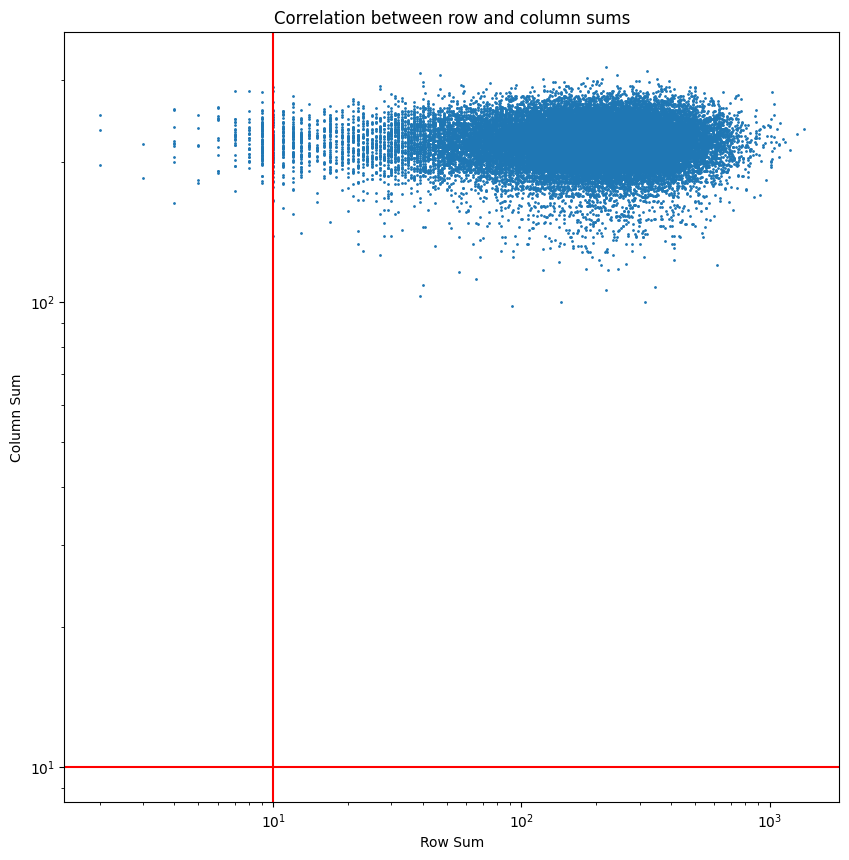

In [11]:
counts = sim_counts.pivot(index='source_bead', columns='target_bead', values='bead_counts')
counts = counts.fillna(0.0)
counts[0] = 0
counts = counts.loc[:,sorted(counts.columns)]
counts_test = counts.copy()
#counts_test = counts.loc[test.index, test.index]

row_sums = counts_test.sum(axis=1)
col_sums = counts_test.sum(axis=0)

sums = counts_test.sum(axis=1) + counts_test.sum(axis=0) # changed normalization
counts_test = counts_test.div(sums, axis=0)

plt.figure(figsize=(10, 10))
plt.title('Correlation between row and column sums')
plt.xlabel('Row Sum')
plt.ylabel('Column Sum')
plt.scatter(row_sums, col_sums, s=1)
plt.yscale('log')
plt.xscale('log')
plt.axvline(x=10, color='r', linestyle='-', label='Vertical Line')
plt.axhline(y=10, color='r', linestyle='-', label='Horizontal Line')
plt.show()

In [9]:
sim_counts

,source_bead,target_bead,bead_counts
0,0,1,50
1,0,2,10
2,0,3,6
3,0,4,4
4,0,6,3
...,...,...,...
5621626,38808,38611,23
5621627,38808,38761,1
5621628,38808,38805,2
5621629,38808,38806,3


In [10]:
real_counts

,row_idx,col_idx,read_count
0,0,68,1
1,0,135,1
2,0,167,2
3,0,278,5
4,0,467,1
...,...,...,...
8597474,38798,37265,10
8597475,38798,37591,1
8597476,38798,38073,2
8597477,38798,38154,1


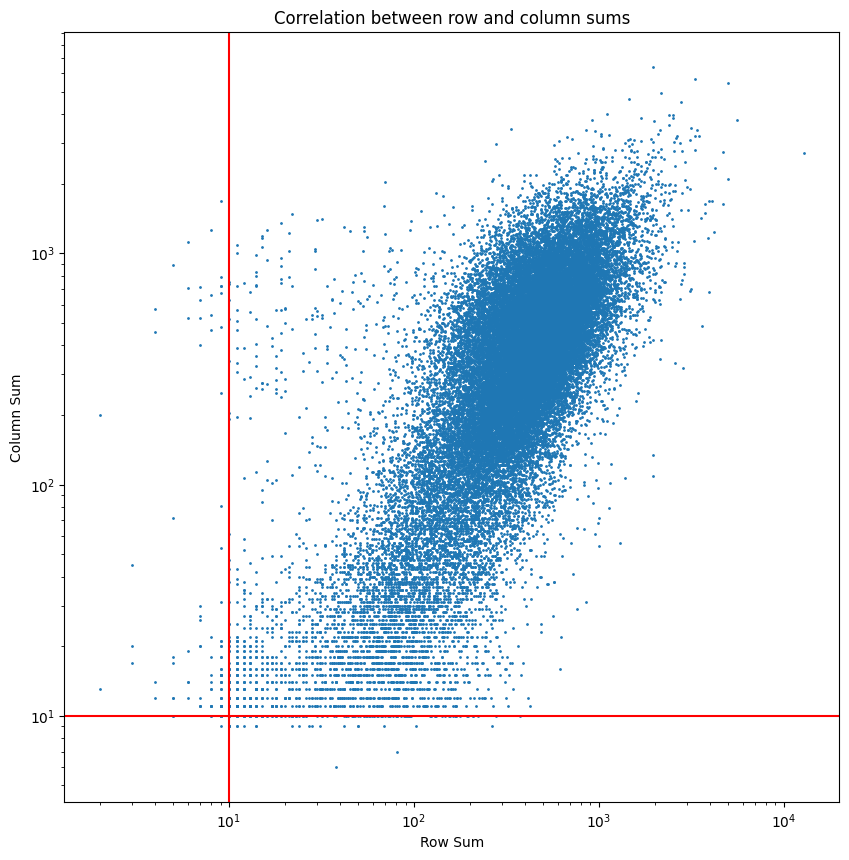

In [13]:
counts = real_counts.pivot(index='row_idx', columns='col_idx', values='read_count')
counts = counts.fillna(0.0)
counts[0] = 0
counts = counts.loc[:,sorted(counts.columns)]
counts_test = counts.copy()
#counts_test = counts.loc[test.index, test.index]

row_sums = counts_test.sum(axis=1)
col_sums = counts_test.sum(axis=0)

sums = counts_test.sum(axis=1) + counts_test.sum(axis=0) # changed normalization
counts_test = counts_test.div(sums, axis=0)

plt.figure(figsize=(10, 10))
plt.title('Correlation between row and column sums')
plt.xlabel('Row Sum')
plt.ylabel('Column Sum')
plt.scatter(row_sums, col_sums, s=1)
plt.yscale('log')
plt.xscale('log')
plt.axvline(x=10, color='r', linestyle='-', label='Vertical Line')
plt.axhline(y=10, color='r', linestyle='-', label='Horizontal Line')
plt.show()

In [16]:
sums_df = pd.DataFrame({'row_sums': row_sums, 'col_sums': col_sums}, dtype=int)
sums_df.to_csv('../_data/nextera_interactions_filtered_joint_sums.csv', index=False)

In [22]:
row_sum, col_sum = sums_df.iloc[4]

row_sum, col_sum

(263, 134)